In [2]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

In [3]:
#Import Dataset
data_frame =  pd.read_csv('../data/cluster2.csv', header=None)

print(data_frame.head(10))

print(data_frame.describe())

print(data_frame.shape)

         0        1
0  1.29100  0.69396
1  1.18090 -0.30723
2  3.28500 -4.64440
3  0.91569  1.12690
4  1.39120  0.40360
5 -1.51490 -4.25820
6  0.56181 -0.28797
7  0.46176 -0.41708
8 -0.47588 -2.24790
9 -0.25928 -1.95980
                 0            1
count  1000.000000  1000.000000
mean      0.504846    -1.299770
std       1.446807     2.032146
min      -3.170900    -4.985100
25%      -0.595442    -3.492500
50%       0.785950    -1.034500
75%       1.379325     0.502935
max       4.691600     2.733400
(1000, 2)


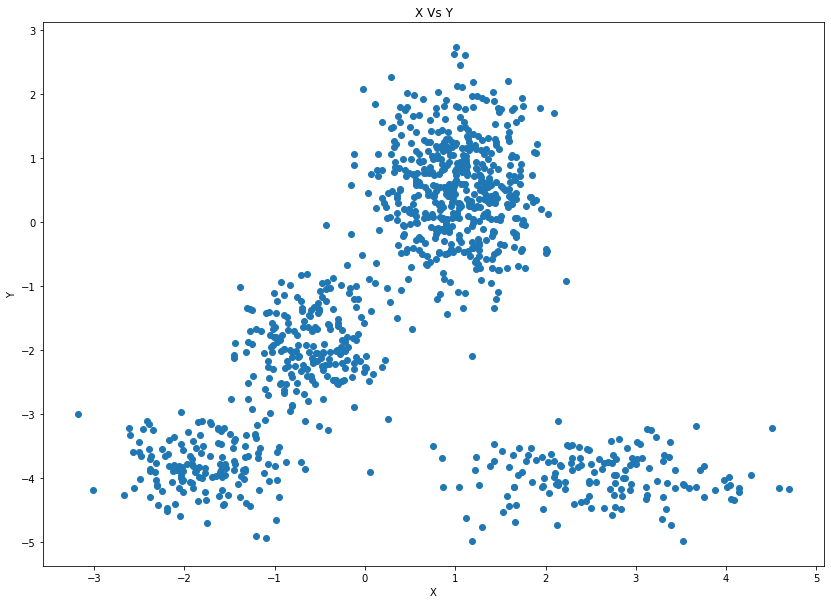

In [4]:
#Visualize the data
X = data_frame.to_numpy().reshape(len(data_frame), -1)
y = data_frame.loc[:,1]

plt.figure(figsize=(14,10))
plt.title('X Vs Y')
plt.scatter(X[:,0],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


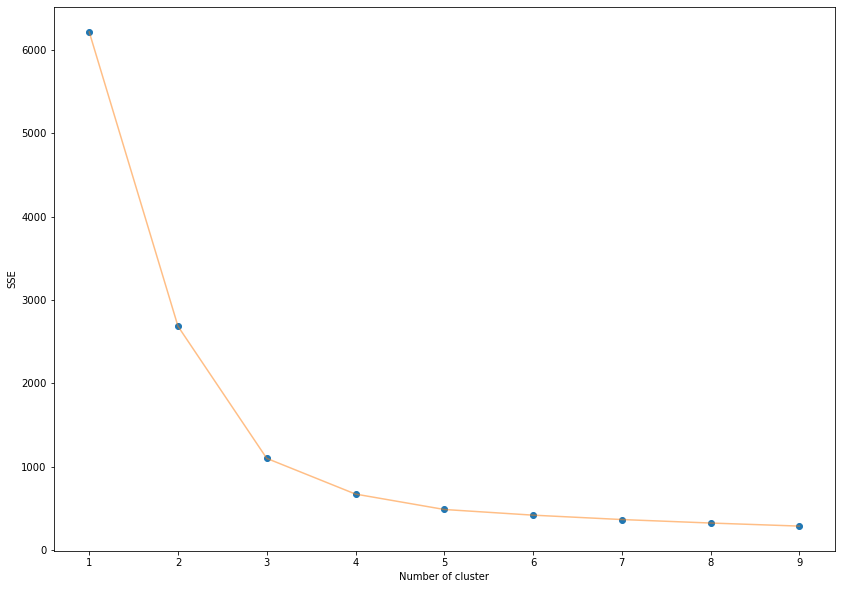

In [5]:
#
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,  init='k-means++', random_state=40).fit(X)
    sse[k] = kmeans.inertia_
    # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(1 , figsize = (14,10))
plt.plot(list(sse.keys()) , list(sse.values()) , 'o')
plt.plot(list(sse.keys()) , list(sse.values()) , '-' , alpha = 0.5)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Elbow score uses sum of squared errors, showing the trend that as more clusters are added the error decreases. Elbow highlights where the addition of further clusters has diminishing returns.
From the above elbow method, we can see that the optimal number of clusters == 4

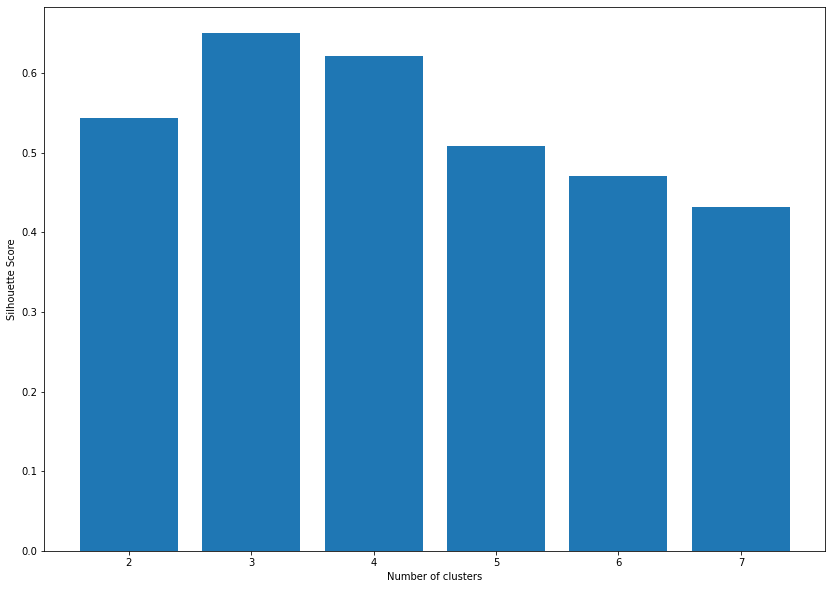

In [6]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters= n_cluster, init='k-means++', random_state=40).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(1 , figsize = (14,10))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

From the above, the diagram suggest k=3

In [7]:
#Model Build with 3 clusters
model = KMeans(n_clusters= 4, init='k-means++', random_state=40)
y_kmeans= model.fit_predict(X)

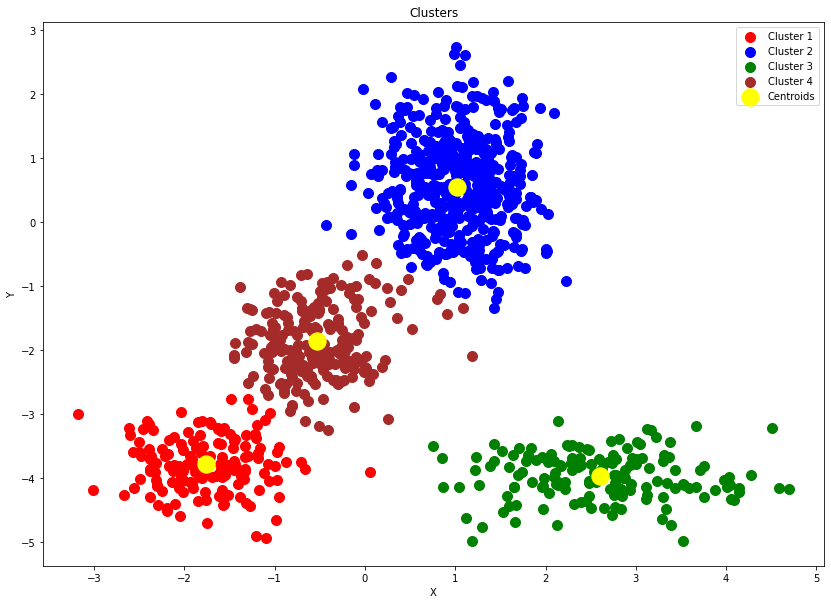

In [8]:
plt.figure(figsize=(14,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Bayesian information criterion (BIC)
The Bayesian information criterion (BIC) gives us an estimation of how good the GMM is in terms of predicting the data we actually have. The lower is the BIC, the better is the model to actually predict the data we have, and by extension, the true, unknown, distribution. In order to avoid overfitting, this technique penalizes models with a big number of clusters.

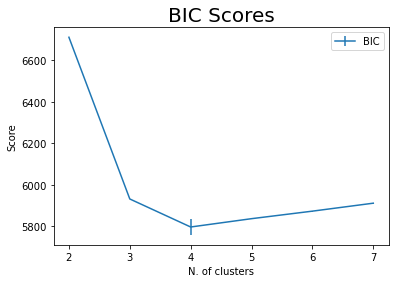

In [10]:
#Component Selection
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X) 
        
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

    
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

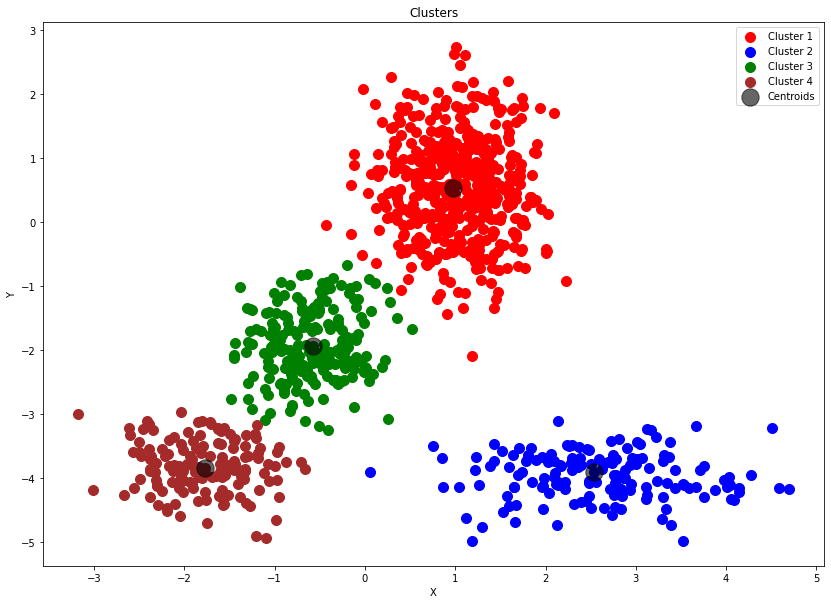

In [11]:
gmm = GaussianMixture(n_components=4, n_init=2).fit(X)
prediction_gmm = gmm.predict(X)
probs = gmm.predict_proba(X)

centers = np.zeros((4,2))
for i in range(4):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]

plt.figure(figsize = (14,10))
#plt.scatter(X[:, 0], X[:, 1],c=prediction_gmm ,s=50, cmap='viridis')
plt.scatter(X[prediction_gmm == 0, 0], X[prediction_gmm == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[prediction_gmm == 1, 0], X[prediction_gmm == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[prediction_gmm == 2, 0], X[prediction_gmm == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[prediction_gmm == 3, 0], X[prediction_gmm == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6, label = 'Centroids');
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data!
